In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder, StandardScaler
from scipy.stats import zscore, yeojohnson
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression, LinearRegression, Ridge
from sklearn.metrics import plot_roc_curve, accuracy_score, r2_score, confusion_matrix, mean_squared_error, classification_report, mean_absolute_error
from sklearn.utils import resample
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.svm import SVC, SVR
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
import joblib

import warnings
warnings.filterwarnings('ignore')

# Data Collection

In [ ]:
df = pd.read_csv(r'C:\Users\Shubham\Desktop\Projects\Evaluation\(4)_Global\database_IND.csv')

# Data Understanding

In [ ]:
pd.set_option("display.max_columns", None)
df.head() #Looking into the top 5 rows of the dataset

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,other_fuel3,commissioning_year,owner,source,url,geolocation_source,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,NaN,2011.0,Solar Paces,National Renewable Energy Laboratory,http://www.nrel.gov/csp/solarpaces/project_det...,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,NaN,NaN,Ultratech Cement ltd,Ultratech Cement ltd,http://www.ultratechcement.com/,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,NaN,NaN,AES,CDM,https://cdm.unfccc.int/Projects/DB/DNV-CUK1328...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,NaN,2004.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,NaN,2019.0,NaN,617.789264,843.747,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,NaN,2015.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,NaN,2019.0,NaN,3035.550000,5916.370,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN


In [ ]:
df.columns #Calling all the column names of the dataset

Index(['country', 'country_long', 'name', 'gppd_idnr', 'capacity_mw',
       'latitude', 'longitude', 'primary_fuel', 'other_fuel1', 'other_fuel2',
       'other_fuel3', 'commissioning_year', 'owner', 'source', 'url',
       'geolocation_source', 'wepp_id', 'year_of_capacity_data',
       'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018',
       'generation_gwh_2019', 'generation_data_source',
       'estimated_generation_gwh'],
      dtype='object')

- `country` (text): 3 character country code corresponding to the ISO 3166-1 alpha-3 specification [5]
- `country_long` (text): longer form of the country designation
- `name` (text): name or title of the power plant, generally in Romanized form
- `gppd_idnr` (text): 10 or 12 character identifier for the power plant
- `capacity_mw` (number): electrical generating capacity in megawatts
- `latitude` (number): geolocation in decimal degrees; WGS84 (EPSG:4326)
- `longitude` (number): geolocation in decimal degrees; WGS84 (EPSG:4326)
- `primary_fuel` (text): energy source used in primary electricity generation or export
- `other_fuel1` (text): energy source used in electricity generation or export
- `other_fuel2` (text): energy source used in electricity generation or export
- `other_fuel3` (text): energy source used in electricity generation or export
- `commissioning_year` (number): year of plant operation, weighted by unit-capacity when data is available
- `owner` (text): majority shareholder of the power plant, generally in Romanized form
- `source` (text): entity reporting the data; could be an organization, report, or document, generally in Romanized form
- `url` (text): web document corresponding to the `source` field
- `geolocation_source` (text): attribution for geolocation information
- `wepp_id` (text): a reference to a unique plant identifier in the widely-used PLATTS-WEPP database.
- `year_of_capacity_data` (number): year the capacity information was reported
- `generation_gwh_2013` (number): electricity generation in gigawatt-hours reported for the year 2013
- `generation_gwh_2014` (number): electricity generation in gigawatt-hours reported for the year 2014
- `generation_gwh_2015` (number): electricity generation in gigawatt-hours reported for the year 2015
- `generation_gwh_2016` (number): electricity generation in gigawatt-hours reported for the year 2016
- `generation_gwh_2017` (number): electricity generation in gigawatt-hours reported for the year 2017
- `generation_gwh_2018` (number): electricity generation in gigawatt-hours reported for the year 2018
- `generation_gwh_2019` (number): electricity generation in gigawatt-hours reported for the year 2019
- `generation_data_source` (text): attribution for the reported generation information
- `estimated_generation_gwh_2013` (number): estimated electricity generation in gigawatt-hours for the year 2013
- `estimated_generation_gwh_2014` (number): estimated electricity generation in gigawatt-hours for the year 2014
- `estimated_generation_gwh_2015` (number): estimated electricity generation in gigawatt-hours for the year 2015
- `estimated_generation_gwh_2016` (number): estimated electricity - generation in gigawatt-hours for the year 2016
- `estimated_generation_gwh_2017` (number): estimated electricity generation in gigawatt-hours for the year 2017
- 'estimated_generation_note_2013` (text): label of the model/method used to estimate generation for the year 2013
- `estimated_generation_note_2014` (text): label of the model/method used to estimate generation for the year 2014
- `estimated_generation_note_2015` (text): label of the model/method used to estimate generation for the year 2015
- `estimated_generation_note_2016` (text): label of the model/method used to estimate generation for the year 2016
- `estimated_generation_note_2017` (text): label of the model/method used to estimate generation for the year 2017

In [ ]:
df.shape #Looking into the shape of the dataset

(907, 27)

In [ ]:
df.info() #Basic info of the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   907 non-null    object 
 1   country_long              907 non-null    object 
 2   name                      907 non-null    object 
 3   gppd_idnr                 907 non-null    object 
 4   capacity_mw               907 non-null    float64
 5   latitude                  861 non-null    float64
 6   longitude                 861 non-null    float64
 7   primary_fuel              907 non-null    object 
 8   other_fuel1               198 non-null    object 
 9   other_fuel2               1 non-null      object 
 10  other_fuel3               0 non-null      float64
 11  commissioning_year        527 non-null    float64
 12  owner                     342 non-null    object 
 13  source                    907 non-null    object 
 14  url       

In [ ]:
df.isnull().sum() #Checking for null values again

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                     46
longitude                    46
primary_fuel                  0
other_fuel1                 709
other_fuel2                 906
other_fuel3                 907
commissioning_year          380
owner                       565
source                        0
url                           0
geolocation_source           19
wepp_id                     907
year_of_capacity_data       388
generation_gwh_2013         907
generation_gwh_2014         509
generation_gwh_2015         485
generation_gwh_2016         473
generation_gwh_2017         467
generation_gwh_2018         459
generation_gwh_2019         907
generation_data_source      458
estimated_generation_gwh    907
dtype: int64

<AxesSubplot:>

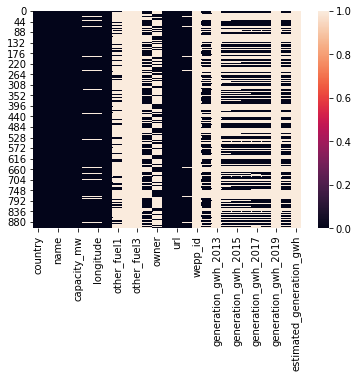

In [ ]:
sns.heatmap(df.isnull()) #Visualization of null values

In [ ]:
df.describe() #Statistical evaluation of teh dataset

,capacity_mw,latitude,longitude,other_fuel3,commissioning_year,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,estimated_generation_gwh
count,907.000000,861.000000,861.000000,0.0,527.000000,0.0,519.0,0.0,398.000000,422.000000,434.000000,440.000000,448.000000,0.0,0.0
mean,326.223755,21.197918,77.464907,NaN,1997.091082,NaN,2019.0,NaN,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,NaN,NaN
std,590.085456,6.239612,4.939316,NaN,17.082868,NaN,0.0,NaN,4026.440035,4194.596959,4162.884308,4196.991169,4314.880456,NaN,NaN
min,0.000000,8.168900,68.644700,NaN,1927.000000,NaN,2019.0,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN
25%,16.725000,16.773900,74.256200,NaN,1988.000000,NaN,2019.0,NaN,223.557672,176.381063,188.285252,177.874930,193.378250,NaN,NaN
50%,59.200000,21.780000,76.719500,NaN,2001.000000,NaN,2019.0,NaN,801.123775,711.181225,737.205450,817.977250,751.644375,NaN,NaN
75%,385.250000,25.512400,79.440800,NaN,2012.000000,NaN,2019.0,NaN,3035.306250,3084.121250,3282.861313,3275.690475,3143.535900,NaN,NaN
max,4760.000000,34.649000,95.408000,NaN,2018.000000,NaN,2019.0,NaN,28127.000000,30539.000000,30015.000000,35116.000000,35136.000000,NaN,NaN


# Exploratory Data Analysis

Let us now look into all the columns one at a time, beginning with the target columns primary_fuel and capacity_mw

In [ ]:
#Counting for any null values
df['primary_fuel'].isnull().sum()

0

<AxesSubplot:xlabel='primary_fuel', ylabel='count'>

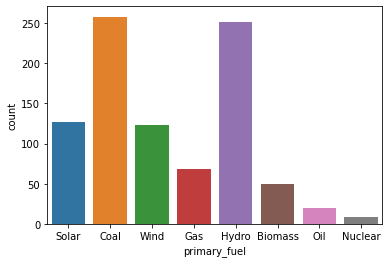

In [ ]:
#Countplot for the Primary_fuel
sns.countplot(df['primary_fuel'])

Encoding the data, converting it to numerical value

In [ ]:
#Encoding the data
le = LabelEncoder()
df['primary_fuel'] = le.fit_transform(df['primary_fuel']) #Encoding data

<AxesSubplot:xlabel='primary_fuel'>

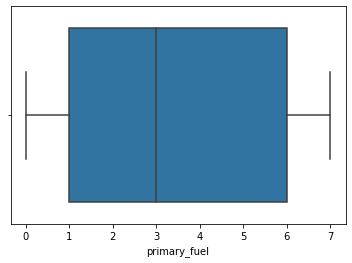

In [ ]:
#Boxplot for the Primary_fuel
sns.boxplot(df['primary_fuel'])

In [ ]:
#Counting for any null values
df['capacity_mw'].isnull().sum()

0

<AxesSubplot:xlabel='capacity_mw', ylabel='Density'>

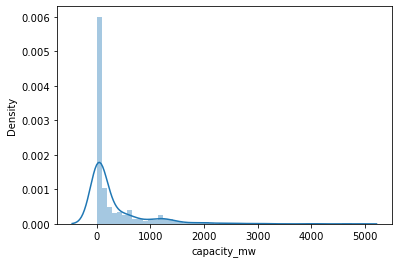

In [ ]:
#Density plot for the capacity_mw
sns.distplot(df['capacity_mw'])

<AxesSubplot:xlabel='capacity_mw'>

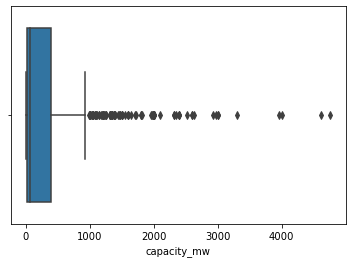

In [ ]:
#Boxplot for the capacity_mw
sns.boxplot(df['capacity_mw'])

<AxesSubplot:xlabel='country', ylabel='count'>

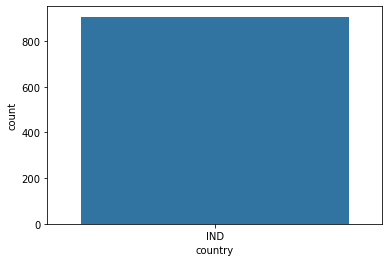

In [ ]:
#Countplot for the country
sns.countplot(df['country'])

In [ ]:
df['country'].value_counts()

IND    907
Name: country, dtype: int64

Since, all the data is from IND, it doesnt play much role in the model. Hence we can drop this table

In [ ]:
#Dropping the column country
df = df.drop(columns='country')

<AxesSubplot:xlabel='country_long', ylabel='count'>

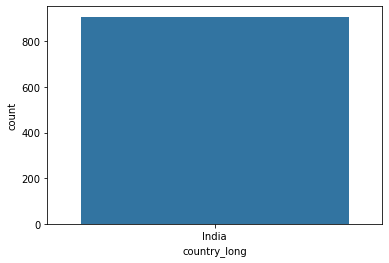

In [ ]:
#Countplot for the country_long
sns.countplot(df['country_long'])

In [ ]:
df['country_long'].value_counts()

India    907
Name: country_long, dtype: int64

Since, all the data is from India, it doesnt play much role in the model. Hence we can drop this table

In [ ]:
#Dropping the column country_long
df = df.drop(columns = 'country_long')

In [ ]:
#Encoding data for column 'name'
df['name'] = le.fit_transform(df['name'])

<AxesSubplot:xlabel='name', ylabel='Density'>

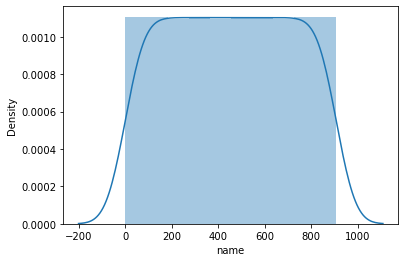

In [ ]:
#Density plot for column 'name'
sns.distplot(df['name'])

<AxesSubplot:xlabel='name'>

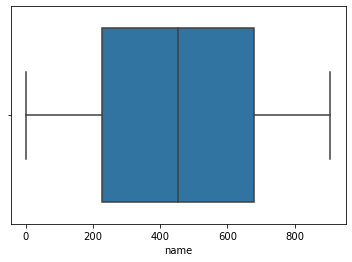

In [ ]:
#Box plot for column 'name'
sns.boxplot(df['name'])

In [ ]:
#Checking for the unique values gppd_idnr
df['gppd_idnr'].nunique()

907

In [ ]:
#Encoding the data for gppd_idnr
df['gppd_idnr'] = le.fit_transform(df['gppd_idnr'])

<AxesSubplot:xlabel='gppd_idnr', ylabel='Density'>

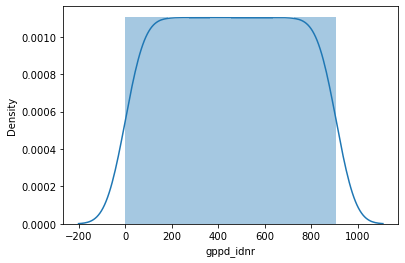

In [ ]:
#Density plot for column 'gppd_idnr'
sns.distplot(df['gppd_idnr'])

<AxesSubplot:xlabel='gppd_idnr'>

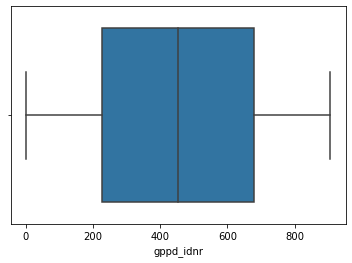

In [ ]:
#Box plot for column 'gppd_idnr'
sns.boxplot(df['gppd_idnr'])

In [ ]:
#Checking for null values
df['latitude'].isnull().sum()

46

Let us fill the null values with the mean values to complete the data

In [ ]:
#Replacing null values with mean
df['latitude'].fillna(df['latitude'].mean(), inplace=True)

In [ ]:
#Checking for null values
df['latitude'].isnull().sum()

0

<AxesSubplot:xlabel='latitude', ylabel='Density'>

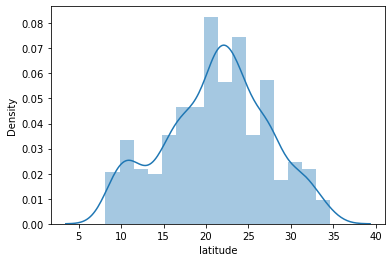

In [ ]:
#Density plot for the latitude
sns.distplot(df['latitude'])

<AxesSubplot:xlabel='latitude'>

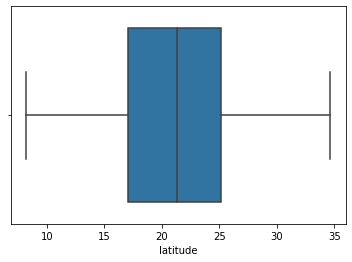

In [ ]:
#Box plot for the latitude
sns.boxplot(df['latitude'])

In [ ]:
#Checking for null values
df['longitude'].isnull().sum()

46

Let us fill the null values with the mean values to complete the data

In [ ]:
#Replacing null values with mean
df['longitude'].fillna(df['longitude'].mean(), inplace=True)

In [ ]:
#Checking for null values
df['longitude'].isnull().sum()

0

<AxesSubplot:xlabel='longitude', ylabel='Density'>

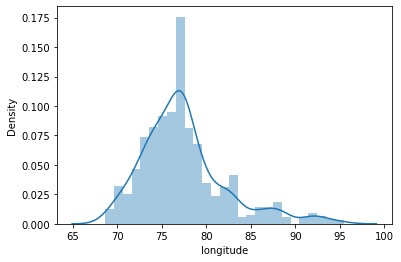

In [ ]:
#Density plot for the longitude
sns.distplot(df['longitude'])

<AxesSubplot:xlabel='longitude'>

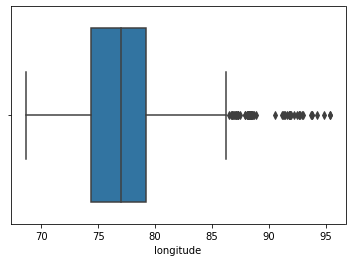

In [ ]:
#Box plot for the latitude
sns.boxplot(df['longitude'])

In [ ]:
#Checking for null values
df['other_fuel1'].isnull().sum()

709

In [ ]:
df['other_fuel1'].value_counts()

Oil             195
Gas               2
Cogeneration      1
Name: other_fuel1, dtype: int64

We see that data is highly imbalanced and mostly null values. Filling this data can manipulate the model in a negative way and so we shall drop this column.

In [ ]:
#Dropping the column other_fuel1
df = df.drop(columns = 'other_fuel1')

In [ ]:
#Checking for null values
df['other_fuel2'].isnull().sum()

906

We see that data is highly imbalanced and mostly null values. Filling this data can manipulate the model in a negative way and so we shall drop this column.

In [ ]:
#Dropping the column other_fuel2
df = df.drop(columns = 'other_fuel2')

In [ ]:
#Checking for null values
df['other_fuel3'].isnull().sum()

907

This column is completely null and so we can drop this column too

In [ ]:
#Dropping the column other_fuel3
df = df.drop(columns = 'other_fuel3')

In [ ]:
#Checking for null values
df['commissioning_year'].isnull().sum()

380

<AxesSubplot:xlabel='commissioning_year', ylabel='Density'>

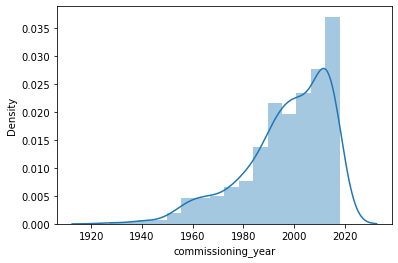

In [ ]:
#Density plot
sns.distplot(df['commissioning_year'])

In [ ]:
#Checking unique values
df['commissioning_year'].nunique()

73

We shall replace all the null values in the data with the mean to complete the dataset

In [ ]:
#Replacing the null values
df['commissioning_year'].fillna(df['commissioning_year'].mean(), inplace=True)

<AxesSubplot:xlabel='commissioning_year', ylabel='Density'>

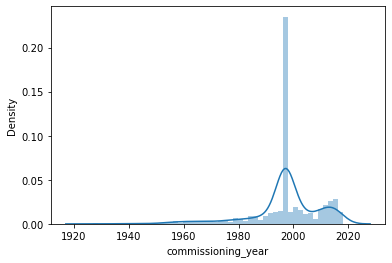

In [ ]:
#Density plot
sns.distplot(df['commissioning_year'])

<AxesSubplot:xlabel='commissioning_year'>

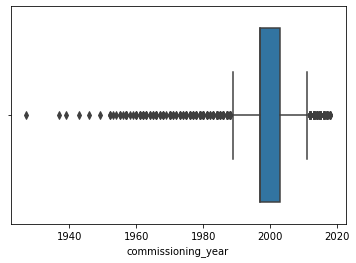

In [ ]:
#Box plot
sns.boxplot(df['commissioning_year'])

In [ ]:
#Checking for null values
df['owner'].isnull().sum()

565

Since more than 60% values are null, we shall drop this column

In [ ]:
#Dropping the column
df.drop(columns='owner', inplace=True)

The column 'source' is just an identity from where the data has been collected. It adds no value to the model prediction and we shall drop the column. Same goes with the columns 'url' and 'geolocation_source', we shall drop these too

In [ ]:
#Dropping the column
df.drop(columns=['source','url','geolocation_source'], inplace=True)

In [ ]:
#Checking for null values
df['wepp_id'].isnull().sum()

907

Since all the values are null, we shall drop this column

In [ ]:
#Dropping the column
df.drop(columns=['wepp_id'], inplace=True)

In [ ]:
#Checking for null values
df['year_of_capacity_data'].isnull().sum()

388

In [ ]:
df['year_of_capacity_data'].value_counts()

2019.0    519
Name: year_of_capacity_data, dtype: int64

Since all the data are for 2019, and we treat the missing values for mode of the data, all the values will be same and therefore it won't manipulate the data in any way and hence we shall drop the column

In [ ]:
#Dropping the column
df.drop(columns=['year_of_capacity_data'], inplace=True)

In [ ]:
#Checking for null values
df['generation_gwh_2013'].isnull().sum()

907

Since all the data is missing we shall drop this column

In [ ]:
#Dropping the column
df.drop(columns=['generation_gwh_2013'], inplace=True)

In [ ]:
#Checking for unique values
df['generation_data_source'].nunique()

We also see that 'generation_gwh_2019','estimated_generation_gwh' are also complete null values and column 'generation_data_source' has only one unique value for the source with max null values. So we deop all the three columns

In [ ]:
#Dropping the columns
df.drop(columns=['generation_gwh_2019','generation_data_source','estimated_generation_gwh'],inplace=True)

We are left with the generation_gwh columns from year 2014 to 2018. We use KNN imputation method to replace the null values

In [ ]:
imputer = KNNImputer(n_neighbors=2, weights="uniform")
df = imputer.fit_transform(df)

In [ ]:
df_new = pd.DataFrame({'name':df[:,0], 'gppd_idnr':df[:,1], 'capacity_mw':df[:,2], 'latitude':df[:,3], 'longitude':df[:,4], 'primary_fuel':df[:,5], 'commissioning_year':df[:,6], 'generation_gwh_2014':df[:,7], 'generation_gwh_2015':df[:,8], 'generation_gwh_2016':df[:,9], 'generation_gwh_2017':df[:,10], 'generation_gwh_2018':df[:,11]})

In [ ]:
df = df_new
df

,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,0.0,657.0,2.5,28.1839,73.2407,6.0,2011.000000,132.265350,109.947500,266.733325,223.636200,298.345775
1,1.0,519.0,98.0,24.7663,74.6090,1.0,1997.091082,82.162125,81.162150,266.733325,223.636200,298.345775
2,2.0,853.0,39.2,21.9038,69.3732,7.0,1997.091082,56.267250,67.819200,266.733325,223.636200,298.345775
3,3.0,0.0,135.0,23.8712,91.3602,2.0,2004.000000,617.789264,843.747000,886.004428,663.774500,626.239128
4,4.0,1.0,1800.0,21.9603,82.4091,1.0,2015.000000,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
902,902.0,491.0,1600.0,16.2949,77.3568,1.0,2016.000000,1469.774200,0.994875,233.596650,865.400000,686.500000
903,903.0,822.0,3.0,12.8932,78.1654,6.0,1997.091082,92.226550,91.500000,102.126800,126.922200,202.044700
904,904.0,891.0,25.5,15.2758,75.5811,7.0,1997.091082,92.226550,91.500000,102.126800,75.341400,294.604575
905,905.0,539.0,80.0,24.3500,73.7477,1.0,1997.091082,92.226550,91.500000,102.126800,273.245625,118.245800


Now we have treated for null values and the data is complete, we move forward treating the data for outliers and skewness before making the prediction model

# Correlation

Now, since all the data has been transformed into numeric values. Let us check for the correlation to the target column

In [ ]:
df.corr() #Correlation matrix

,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
name,1.000000,0.332205,0.060240,-0.129817,0.020279,0.040753,-0.043569,0.084265,0.069765,0.059067,0.059064,0.062562
gppd_idnr,0.332205,1.000000,-0.335742,-0.105131,-0.377812,0.609180,0.044059,-0.222379,-0.226065,-0.244045,-0.249130,-0.235962
capacity_mw,0.060240,-0.335742,1.000000,0.054675,0.195882,-0.380395,0.274292,0.836845,0.854250,0.879806,0.896898,0.907807
latitude,-0.129817,-0.105131,0.054675,1.000000,0.035634,-0.016565,0.104661,0.052339,0.048398,0.049805,0.064092,0.056008
longitude,0.020279,-0.377812,0.195882,0.035634,1.000000,-0.347948,0.092331,0.143251,0.155205,0.174084,0.188255,0.181699
primary_fuel,0.040753,0.609180,-0.380395,-0.016565,-0.347948,1.000000,-0.126650,-0.283522,-0.284917,-0.294764,-0.305925,-0.298053
commissioning_year,-0.043569,0.044059,0.274292,0.104661,0.092331,-0.126650,1.000000,0.118378,0.148634,0.178671,0.192944,0.198383
generation_gwh_2014,0.084265,-0.222379,0.836845,0.052339,0.143251,-0.283522,0.118378,1.000000,0.965985,0.941593,0.916955,0.908012
generation_gwh_2015,0.069765,-0.226065,0.854250,0.048398,0.155205,-0.284917,0.148634,0.965985,1.000000,0.974331,0.946590,0.941187
generation_gwh_2016,0.059067,-0.244045,0.879806,0.049805,0.174084,-0.294764,0.178671,0.941593,0.974331,1.000000,0.975817,0.966881


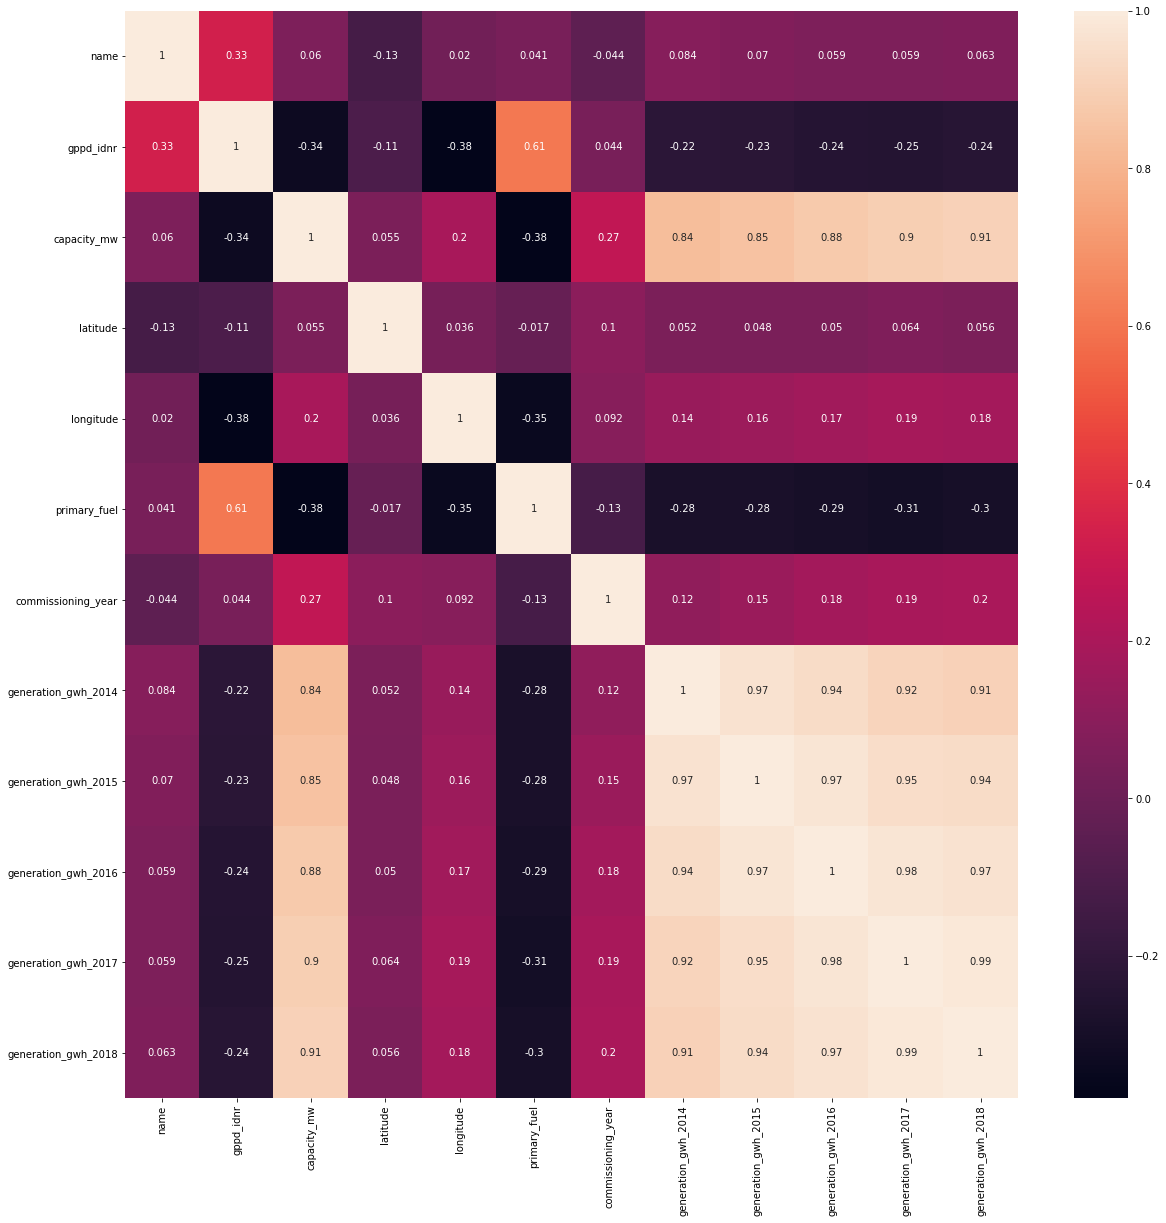

In [ ]:
#Visualization for correlation matrix
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),annot=True)
plt.show()

We see that the columns generation_gwh 2014 to 2018 play a high correlation to the capacity_mw. Whereas for primary_fuel correlation is highest for gppd_idnr

In [ ]:
#Correlation wrt target column
df.corr()['capacity_mw'].sort_values()

primary_fuel          -0.380395
gppd_idnr             -0.335742
latitude               0.054675
name                   0.060240
longitude              0.195882
commissioning_year     0.274292
generation_gwh_2014    0.836845
generation_gwh_2015    0.854250
generation_gwh_2016    0.879806
generation_gwh_2017    0.896898
generation_gwh_2018    0.907807
capacity_mw            1.000000
Name: capacity_mw, dtype: float64

In [ ]:
#Correlation wrt target column
df.corr()['primary_fuel'].sort_values()

capacity_mw           -0.380395
longitude             -0.347948
generation_gwh_2017   -0.305925
generation_gwh_2018   -0.298053
generation_gwh_2016   -0.294764
generation_gwh_2015   -0.284917
generation_gwh_2014   -0.283522
commissioning_year    -0.126650
latitude              -0.016565
name                   0.040753
gppd_idnr              0.609180
primary_fuel           1.000000
Name: primary_fuel, dtype: float64

# Outliers

We use the zscore method to remove the outliers with a threshold of 3

In [ ]:
z = np.abs(zscore(df))
df_new = df[(z<3).all(axis=1)]

In [ ]:
df_new.shape

(847, 12)

In [ ]:
print('Percentage loss of data =\t', ((df.shape[0]-df_new.shape[0])/df.shape[0])*100, '%')

Percentage loss of data =	 6.615214994487322 %


In [ ]:
df = df_new

# Skewness

Now, we split the data into feature and target columns. We do that in two parts as we produce model for 2 target columns

In [ ]:
# Target = primary_fuel
x2 = df.drop(columns='primary_fuel')
y2 = df['primary_fuel']

In [ ]:
# Target = capacity_mw
x1 = df.drop(columns='capacity_mw')
y1 = df['capacity_mw']

Treating skewness for Target 1

In [ ]:
x1.skew()

name                   0.023001
gppd_idnr             -0.081120
latitude              -0.106853
longitude              0.923751
primary_fuel           0.407684
commissioning_year    -0.848106
generation_gwh_2014    2.777018
generation_gwh_2015    2.665042
generation_gwh_2016    2.635547
generation_gwh_2017    2.530046
generation_gwh_2018    2.574791
dtype: float64

In [ ]:
k = []
for i in x1.columns:
    k.append(np.abs(x1[i].skew()))

b=0
for i in x1.columns:
    if k[b]>0.5:
        x1[i] = np.log1p(x1[i])
    b+=1

In [ ]:
x1.skew()

name                   0.023001
gppd_idnr             -0.081120
latitude              -0.106853
longitude              0.742244
primary_fuel           0.407684
commissioning_year    -0.873216
generation_gwh_2014   -0.718155
generation_gwh_2015   -0.419767
generation_gwh_2016   -0.441966
generation_gwh_2017   -0.585945
generation_gwh_2018   -1.047610
dtype: float64

Treating skewness for Target 2

In [ ]:
x2.skew()

name                   0.023001
gppd_idnr             -0.081120
capacity_mw            1.980146
latitude              -0.106853
longitude              0.923751
commissioning_year    -0.848106
generation_gwh_2014    2.777018
generation_gwh_2015    2.665042
generation_gwh_2016    2.635547
generation_gwh_2017    2.530046
generation_gwh_2018    2.574791
dtype: float64

In [ ]:
k = []
for i in x2.columns:
    k.append(np.abs(x2[i].skew()))

b=0
for i in x2.columns:
    if k[b]>0.5:
        x2[i] = np.log1p(x2[i])
    b+=1

In [ ]:
x2.skew()

name                   0.023001
gppd_idnr             -0.081120
capacity_mw            0.088018
latitude              -0.106853
longitude              0.742244
commissioning_year    -0.873216
generation_gwh_2014   -0.718155
generation_gwh_2015   -0.419767
generation_gwh_2016   -0.441966
generation_gwh_2017   -0.585945
generation_gwh_2018   -1.047610
dtype: float64

# Scaling the data for model

In [ ]:
sc=StandardScaler()
x1 = sc.fit_transform(x1)
x2 = sc.fit_transform(x2)

# Prediction for capacity_mw

## Random State

In [ ]:
maxRS = 0
maxAcc = 0
for i in range(0,100):
    x_train, x_test, y_train, y_test = train_test_split(x1, y1, test_size=0.20, random_state=i)
    lr = LinearRegression()
    lr.fit(x_train,y_train)
    pred = lr.predict(x_test)
    acc = r2_score(y_test, pred)
    if acc>maxAcc:
        maxAcc = acc
        maxRS = i
print("Max accuracy: \t", maxAcc)
print("Random State: \t", maxRS)

Max accuracy: 	 0.656550096901843
Random State: 	 32


Now since we got the best random state for data modelling, we create the test train models

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x1, y1, test_size=0.20, random_state=maxRS)

## Model Predictions

Linear Regression

In [ ]:
lr = LinearRegression()
lr.fit(x_train,y_train)
pred = lr.predict(x_test)
print("r2 score: \t", r2_score(y_test,pred)*100)
print("Mean Square Error : \t", mean_squared_error(y_test,pred))
print("Root Mean Square Error : \t", np.sqrt(mean_squared_error(y_test,pred)))

r2 score: 	 65.6550096901843
Mean Square Error : 	 60341.737119147314
Root Mean Square Error : 	 245.6455518000424


Ridge Regression

In [ ]:
rr = Ridge()
rr.fit(x_train,y_train)
pred = rr.predict(x_test)
print("r2 score: \t", r2_score(y_test,pred)*100)
print("Mean Square Error : \t", mean_squared_error(y_test,pred))
print("Root Mean Square Error : \t", np.sqrt(mean_squared_error(y_test,pred)))

r2 score: 	 65.64485625741834
Mean Square Error : 	 60359.57598779436
Root Mean Square Error : 	 245.68185929733264


KNN MODEL

In [ ]:
knn = KNeighborsRegressor()
knn.fit(x_train,y_train)
pred = knn.predict(x_test)
print("r2 score: \t", r2_score(y_test,pred)*100)
print("Mean Square Error : \t", mean_squared_error(y_test,pred))
print("Root Mean Square Error : \t", np.sqrt(mean_squared_error(y_test,pred)))

r2 score: 	 84.0439423960076
Mean Square Error : 	 28033.673170753875
Root Mean Square Error : 	 167.43259291653425


SUPPORT VECTOR MACHINES

In [ ]:
svr = SVR()
svr.fit(x_train,y_train)
pred = svr.predict(x_test)
print("r2 score: \t", r2_score(y_test,pred)*100)
print("Mean Square Error : \t", mean_squared_error(y_test,pred))
print("Root Mean Square Error : \t", np.sqrt(mean_squared_error(y_test,pred)))

r2 score: 	 -7.0091150341266895
Mean Square Error : 	 188007.50358332298
Root Mean Square Error : 	 433.59832054947236


Random Forest Regressor

In [ ]:
rf = RandomForestRegressor()
rf.fit(x_train,y_train)
pred = rf.predict(x_test)
print("r2 score: \t", r2_score(y_test,pred)*100)
print("Mean Square Error : \t", mean_squared_error(y_test,pred))
print("Root Mean Square Error : \t", np.sqrt(mean_squared_error(y_test,pred)))

r2 score: 	 88.55426347968603
Mean Square Error : 	 20109.355629849233
Root Mean Square Error : 	 141.80745971157242


Decision Tree Regressor

In [ ]:
dt = DecisionTreeRegressor()
dt.fit(x_train,y_train)
pred = dt.predict(x_test)
print("r2 score: \t", r2_score(y_test,pred)*100)
print("Mean Square Error : \t", mean_squared_error(y_test,pred))
print("Root Mean Square Error : \t", np.sqrt(mean_squared_error(y_test,pred)))

r2 score: 	 73.62596460665011
Mean Square Error : 	 46337.328854094114
Root Mean Square Error : 	 215.2610713856412


Out of all the models Random Forest Regressor and the KNN model has the highest r2_score

## Cross validation

In [ ]:
scr1 = cross_val_score(lr, x1, y1, cv=5, scoring='r2')
print("Cross validation score of Linear Regression is: \t", scr1.mean())

Cross validation score of Linear Regression is: 	 0.5240540512479015


In [ ]:
scr2 = cross_val_score(rr, x1, y1, cv=5, scoring='r2')
print("Cross validation score of Ridge Regression is: \t", scr2.mean())

Cross validation score of Ridge Regression is: 	 0.524414618887123


In [ ]:
scr3 = cross_val_score(dt, x1, y1, cv=5)
print("Cross validation score of Decision Tree Regressor is: \t", scr3.mean())

Cross validation score of Decision Tree Regressor is: 	 0.6375924778151253


In [ ]:
scr4 = cross_val_score(rf, x1, y1, cv=5)
print("Cross validation score of Random Forest Regressor is: \t", scr4.mean())

Cross validation score of Random Forest Regressor is: 	 0.8148375552235556


In [ ]:
scr5 = cross_val_score(knn, x1, y1, cv=5)
print("Cross validation score of KNeighbour Regressor is: \t", scr5.mean())

Cross validation score of KNeighbour Regressor is: 	 0.734262344198404


In [ ]:
scr6 = cross_val_score(svr, x1, y1, cv=5)
print("Cross validation score of SVM is: \t", scr6.mean())

Cross validation score of SVM is: 	 -0.0519460169702878


Random Forest gives the highest cross validation score

## Hyper Parameter Tuning

In [ ]:
GridSearchCV.get_params(rf)

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [ ]:
parameters = {'bootstrap': [True,False],
              'max_depth': [10, 20,None],
              'max_features': ('auto','sqrt'),
              'min_samples_leaf': [1,2],
              'min_samples_split': [2,5],
              'n_estimators': [100,200]}

In [ ]:
gcv = GridSearchCV(rf, parameters, cv=5, scoring='r2')

In [ ]:
gcv.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'bootstrap': [True, False],
                         'max_depth': [10, 20, None],
                         'max_features': ('auto', 'sqrt'),
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [100, 200]},
             scoring='r2')

In [ ]:
print("Tuned Hyperparameters :", gcv.best_params_)
print("Accuracy :",gcv.best_score_)

Tuned Hyperparameters : {'bootstrap': False, 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200}
Accuracy : 0.8274409166371024


In [ ]:
gcv_pred = gcv.best_estimator_.predict(x_test)
r2_score(y_test,gcv_pred)

0.8883385542788012

We see that the efficiency has increased and hence we will save this model

## Saving the best model

In [ ]:
joblib.dump(gcv.best_estimator_,"global_capacity.pkl")

['global_capacity.pkl']

# Prediction for primary_fuel

## Best Random State

In [ ]:
maxRS = 0
maxAcc = 0
for i in range(40,100):
    x_train, x_test, y_train, y_test = train_test_split(x2, y2, test_size=0.20, random_state=i)
    lr2 = LogisticRegression()
    lr2.fit(x_train,y_train)
    pred = lr2.predict(x_test)
    acc = accuracy_score(y_test, pred)
    if acc>maxAcc:
        maxAcc = acc
        maxRS = i
print("Max accuracy: \t", maxAcc)
print("Random State: \t", maxRS)

Max accuracy: 	 0.7529411764705882
Random State: 	 70


Now since we got the best random state for data modelling, we create the test train models

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x2, y2, test_size=0.20, random_state=maxRS)

## Model Predictions

Logistic Regression

In [ ]:
lr2 = LogisticRegression()
lr2.fit(x_train,y_train)
pred = lr2.predict(x_test)
print("Accuracy: \t", accuracy_score(y_test,pred)*100)
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

Accuracy: 	 75.29411764705883
[[ 7  4  0  2  0  0  0  0]
 [ 2 36  0  6  0  0  0  0]
 [ 0  3  4  1  0  1  0  1]
 [ 0  8  0 36  0  1  0  0]
 [ 0  1  0  0  0  0  0  0]
 [ 0  1  0  0  0  1  0  0]
 [ 0  0  0  0  0  0 20  5]
 [ 1  0  0  0  0  0  5 24]]
              precision    recall  f1-score   support

         0.0       0.70      0.54      0.61        13
         1.0       0.68      0.82      0.74        44
         2.0       1.00      0.40      0.57        10
         3.0       0.80      0.80      0.80        45
         4.0       0.00      0.00      0.00         1
         5.0       0.33      0.50      0.40         2
         6.0       0.80      0.80      0.80        25
         7.0       0.80      0.80      0.80        30

    accuracy                           0.75       170
   macro avg       0.64      0.58      0.59       170
weighted avg       0.76      0.75      0.75       170



K-Nearest Neighbors

In [ ]:
knn2 = KNeighborsClassifier()
knn2.fit(x_train, y_train)
pred = knn2.predict(x_test)
print("Accuracy: \t", accuracy_score(y_test,pred)*100)
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

Accuracy: 	 71.17647058823529
[[ 9  2  2  0  0  0  0  0]
 [ 3 35  1  4  0  1  0  0]
 [ 0  4  2  2  0  2  0  0]
 [ 0  5  2 38  0  0  0  0]
 [ 0  1  0  0  0  0  0  0]
 [ 1  0  0  1  0  0  0  0]
 [ 1  2  0  0  0  0 17  5]
 [ 0  2  2  0  0  0  6 20]]
              precision    recall  f1-score   support

         0.0       0.64      0.69      0.67        13
         1.0       0.69      0.80      0.74        44
         2.0       0.22      0.20      0.21        10
         3.0       0.84      0.84      0.84        45
         4.0       0.00      0.00      0.00         1
         5.0       0.00      0.00      0.00         2
         6.0       0.74      0.68      0.71        25
         7.0       0.80      0.67      0.73        30

    accuracy                           0.71       170
   macro avg       0.49      0.48      0.49       170
weighted avg       0.71      0.71      0.71       170



Support Vector Classifier

In [ ]:
svc2 = SVC()
svc2.fit(x_train, y_train)
pred = svc2.predict(x_test)
print("Accuracy: \t", accuracy_score(y_test,pred)*100)
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

Accuracy: 	 76.47058823529412
[[10  2  0  0  0  0  0  1]
 [ 2 37  0  5  0  0  0  0]
 [ 1  5  2  1  0  1  0  0]
 [ 0  4  0 40  0  1  0  0]
 [ 0  1  0  0  0  0  0  0]
 [ 1  0  0  0  0  1  0  0]
 [ 0  1  0  0  0  0 17  7]
 [ 2  1  0  0  0  0  4 23]]
              precision    recall  f1-score   support

         0.0       0.62      0.77      0.69        13
         1.0       0.73      0.84      0.78        44
         2.0       1.00      0.20      0.33        10
         3.0       0.87      0.89      0.88        45
         4.0       0.00      0.00      0.00         1
         5.0       0.33      0.50      0.40         2
         6.0       0.81      0.68      0.74        25
         7.0       0.74      0.77      0.75        30

    accuracy                           0.76       170
   macro avg       0.64      0.58      0.57       170
weighted avg       0.78      0.76      0.75       170



Decision Tree Classifier

In [ ]:
dt2 = DecisionTreeClassifier()
dt2.fit(x_train,y_train)
pred = dt2.predict(x_test)
print("Accuracy: \t", accuracy_score(y_test,pred)*100)
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

Accuracy: 	 83.52941176470588
[[11  2  0  0  0  0  0  0]
 [ 3 31  6  4  0  0  0  0]
 [ 0  1  6  2  0  1  0  0]
 [ 0  3  2 37  0  3  0  0]
 [ 0  1  0  0  0  0  0  0]
 [ 0  0  0  0  0  2  0  0]
 [ 0  0  0  0  0  0 25  0]
 [ 0  0  0  0  0  0  0 30]]
              precision    recall  f1-score   support

         0.0       0.79      0.85      0.81        13
         1.0       0.82      0.70      0.76        44
         2.0       0.43      0.60      0.50        10
         3.0       0.86      0.82      0.84        45
         4.0       0.00      0.00      0.00         1
         5.0       0.33      1.00      0.50         2
         6.0       1.00      1.00      1.00        25
         7.0       1.00      1.00      1.00        30

    accuracy                           0.84       170
   macro avg       0.65      0.75      0.68       170
weighted avg       0.85      0.84      0.84       170



Random Forest Classifier

In [ ]:
rf2 = RandomForestClassifier()
rf2.fit(x_train,y_train)
pred = rf2.predict(x_test)
print("Accuracy: \t", accuracy_score(y_test,pred)*100)
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

Accuracy: 	 89.41176470588236
[[11  2  0  0  0  0  0  0]
 [ 2 39  0  3  0  0  0  0]
 [ 0  4  5  0  0  1  0  0]
 [ 0  2  1 41  0  1  0  0]
 [ 0  1  0  0  0  0  0  0]
 [ 0  1  0  0  0  1  0  0]
 [ 0  0  0  0  0  0 25  0]
 [ 0  0  0  0  0  0  0 30]]
              precision    recall  f1-score   support

         0.0       0.85      0.85      0.85        13
         1.0       0.80      0.89      0.84        44
         2.0       0.83      0.50      0.62        10
         3.0       0.93      0.91      0.92        45
         4.0       0.00      0.00      0.00         1
         5.0       0.33      0.50      0.40         2
         6.0       1.00      1.00      1.00        25
         7.0       1.00      1.00      1.00        30

    accuracy                           0.89       170
   macro avg       0.72      0.71      0.70       170
weighted avg       0.89      0.89      0.89       170



We see that the Random Forest Classifier and the Decision Tree Classifier model gives the most efficiency

## Cross Validation

In [ ]:
scr1 = cross_val_score(lr2, x2, y2, cv=5)
print("Cross validation score of Logistic Regression is: \t", scr1.mean())

Cross validation score of Logistic Regression is: 	 0.6633623390184477


In [ ]:
scr2 = cross_val_score(knn2, x2, y2, cv=5)
print("Cross validation score of KNN is: \t", scr2.mean())

Cross validation score of KNN is: 	 0.6185172293769579


In [ ]:
scr3 = cross_val_score(svc2, x2, y2, cv=5)
print("Cross validation score of SVC is: \t", scr3.mean())

Cross validation score of SVC is: 	 0.6858684302123217


In [ ]:
scr4 = cross_val_score(dt2, x2, y2, cv=5)
print("Cross validation score of Decision Tree is: \t", scr4.mean())

Cross validation score of Decision Tree is: 	 0.7556282631395754


In [ ]:
scr5 = cross_val_score(rf2, x2, y2, cv=5)
print("Cross validation score of Random Forest is: \t", scr5.mean())

Cross validation score of Random Forest is: 	 0.8027775844065437


We can see that 'Random Forest' performs the best among other

## Hyper Parameter Tuning

In [ ]:
GridSearchCV.get_params(rf2)

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [ ]:
parameters = {'bootstrap': [True, False],
              'max_depth': [10, 20, None],
              'max_features': ('auto','sqrt'),
              'min_samples_leaf': [1,2],
              'min_samples_split': [2,3],
              'n_estimators': [100,200]}

In [ ]:
gcv2 = GridSearchCV(rf2, parameters, cv=5, scoring='accuracy')

In [ ]:
gcv2.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True, False],
                         'max_depth': [10, 20, None],
                         'max_features': ('auto', 'sqrt'),
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 3],
                         'n_estimators': [100, 200]},
             scoring='accuracy')

In [ ]:
gcv2.best_score_

0.8138997821350763

In [ ]:
gcv2.best_params_

{'bootstrap': False,
 'max_depth': 10,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 100}

In [ ]:
gcv_pred = gcv2.best_estimator_.predict(x_test)
accuracy_score(y_test,gcv_pred)

0.8941176470588236

gcv best estimator gives the efficiency of 89.41% and we shall save this model

## Saving the best model

In [ ]:
joblib.dump(gcv2.best_estimator_,"global_fuel.pkl")

['global_fuel.pkl']